# TP1 de MCS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

## Partie I

In [3]:
def DTW(w0, w1, w2, seq1, seq2, d):
    I, J = seq2.shape[0], seq1.shape[0]
    g = np.empty((I+1,J+1))
    g.fill(None)

    g[0][0] = 0


    for j in range(1,J+1):
        g[0][j] = np.Infinity

    for i in range(1,I+1):
        g[i][0] = np.Infinity
        for j in range(1,J+1):
            g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)


#     print(g)
    score = g[I][J]/(I+J)
#     print(f'score: {score}')

    return score 

Définition des fonctions de distance

In [4]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [5]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

1.0

Test avec l'exemple de l'exercice **2.1**

In [6]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

3.6

Test avec l'exemple de l'exercice **2.2**

In [7]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [8]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [9]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [10]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

In [11]:
import librosa

In [12]:
m1, sr_m1 = librosa.load("corpus_test/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus_dgo/non_bruite/M20_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [13]:
print(mfcc_m1.transpose().shape)
print(mfcc_m1.transpose())

(23, 12)
[[-5.69067566e+02  3.96389389e+01  1.16038837e+01 -2.67735660e-01
   9.88271117e-01  2.37937379e+00  1.00877911e-01  6.42509699e-01
   2.86828935e-01  8.91457915e-01  2.99287796e+00  1.82023382e+00]
 [-5.58488953e+02  4.44846840e+01  1.02761135e+01  3.52746129e+00
   4.30340958e+00  3.58957005e+00 -1.47373724e+00 -5.46282768e+00
  -5.81379318e+00 -1.21794951e+00 -2.13599253e+00 -6.74367237e+00]
 [-5.27500610e+02  6.16945305e+01 -6.19593811e+00 -1.68548317e+01
  -1.18617082e+00  1.41989098e+01  5.13344002e+00 -8.81754303e+00
  -1.06254597e+01 -1.73280811e+00  3.70688725e+00 -2.25795221e+00]
 [-3.69334015e+02  1.60807571e+02  4.36984825e+00 -2.24313698e+01
  -3.25781326e+01  2.81653252e+01 -2.95342296e-01 -1.72252369e+01
  -6.89808726e-01 -1.46516647e+01 -5.96899986e+00  1.61949527e+00]
 [-2.19406464e+02  2.12065399e+02 -4.60909195e+01 -2.36441422e+01
  -4.77081985e+01  1.98847046e+01 -1.79825325e+01 -2.40556965e+01
   3.44541121e+00 -2.67376785e+01 -2.82614899e+00  1.70961201e-

In [14]:
print(mfcc_f1)

[[-6.18828613e+02 -6.07766052e+02 -6.18259277e+02 -6.13610901e+02
  -3.16548065e+02 -1.89557358e+02 -1.98688873e+02 -1.70788315e+02
  -1.54636597e+02 -2.33654144e+02 -3.22669006e+02 -2.58229187e+02
  -1.61193558e+02 -2.27790421e+02 -2.21338882e+02 -2.35526108e+02
  -3.12782288e+02 -3.88017548e+02 -4.13069916e+02 -4.34809021e+02
  -4.60775757e+02 -5.78447937e+02]
 [ 0.00000000e+00  1.50993252e+01  7.91183054e-01  7.29091406e+00
   1.72136826e+02  1.86211761e+02  1.73236328e+02  1.78295349e+02
   1.75579834e+02  1.68052597e+02  1.55477570e+02  1.04072968e+02
   1.51757416e+02  2.08314041e+02  1.93034912e+02  2.14628906e+02
   1.81912140e+02  1.71293106e+02  1.57398209e+02  1.44030457e+02
   1.24804886e+02  4.72604294e+01]
 [ 0.00000000e+00  1.35412369e+01  7.49960542e-01  7.03175545e+00
  -3.12838535e+01 -6.56323700e+01 -5.24264374e+01 -6.96221466e+01
  -8.17521210e+01 -3.60614510e+01 -2.51696396e+01 -6.37107315e+01
  -6.00957756e+01 -2.66189976e+01 -3.17959900e+01 -2.68666897e+01
  -1.4

In [15]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

70.12889158460828

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [17]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_dgo_test_nb = ['M%.2d'%i for i in range(20,21)]
IDs_M_dgo_test_b = ['M%.2d'%i for i in range(21,22)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_reference = ['M%.2d'%i for i in range(1,2)]
IDs_F_reference = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test
IDs_dgonb = IDs_M_dgo_test_nb
IDs_dgob = IDs_M_dgo_test_b
IDs_reference = IDs_M_reference + IDs_F_reference


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test,
        "diegonb": IDs_dgonb,
        "diegob": IDs_dgob,
       "reference" : IDs_reference # M01 en attendant de trouver mieux
      }

#### Fonction de génération du chemin d'un fichier (Linux)

In [18]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
    elif typeSon == "diegonb":
        chemin = "corpus_dgo/non_bruite"
    elif typeSon == "diegob":
        chemin = "corpus_dgo/bruite"
    elif typeSon == "reference":
        chemin = "corpus_reference"
        
    chemin += f"/{ID}_{action}.wav"
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [19]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

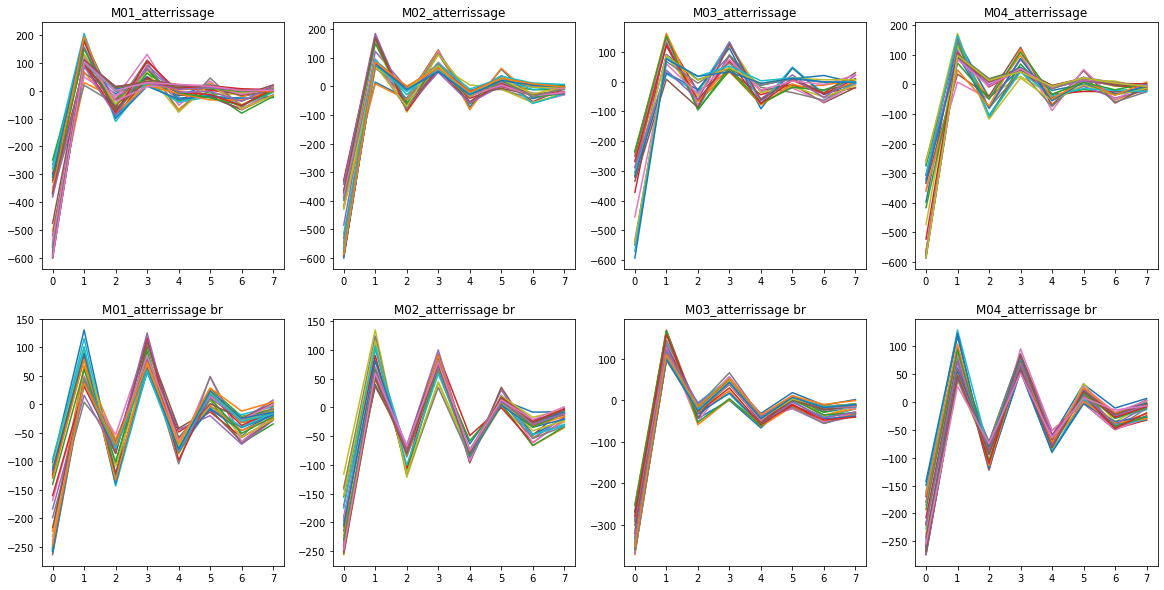

In [20]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

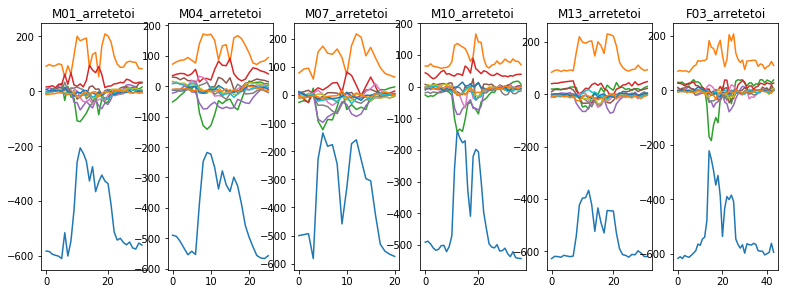

In [21]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [22]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0

    for typeSon in IDs:
        for ID in IDs[typeSon]:
            for action in actions:
                filename = gen_path(typeSon, ID, action)
                if filename != action_to_find:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {action} ({ID})" 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)))


    results.sort(key=lambda k:k[1])

    for i, (action, result) in enumerate(results):
        print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
    print()

    print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')


In [23]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus/dronevolant_nonbruite/M08_plushaut.wav

1:	nonbruite plushaut (F05)    	|	39.35968912349028
2:	nonbruite plushaut (M01)    	|	43.73373696383308
3:	reference plushaut (M01)    	|	43.73373696383308
4:	nonbruite plusbas (M05)     	|	45.475183983923685
5:	nonbruite plushaut (F04)    	|	45.620148862345836
6:	nonbruite plusbas (M01)     	|	46.28892107009888
7:	reference plusbas (M01)     	|	46.28892107009888
8:	nonbruite plushaut (M04)    	|	46.45315154393514
9:	nonbruite decollage (M13)   	|	47.46855066951952
10:	nonbruite plusbas (M08)     	|	49.34523523264918
11:	nonbruite plushaut (M13)    	|	50.59210059222053
12:	nonbruite plushaut (M06)    	|	50.81223282117522
13:	nonbruite plushaut (M09)    	|	51.58227399190267
14:	nonbruite plushaut (M02)    	|	51.63261938095093
15:	nonbruite plushaut (M05)    	|	51.941248164457434
16:	nonbruite plushaut (M11)    	|	52.14460841347189
17:	nonbruite plushaut (M03)    	|	52.70554466905265
18:	nonbruite plusbas (M09)     	|	53.641633921656116
19:	

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [24]:
def compare_mfcc_voices(filepath, affichage = True):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                if filename != filepath:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {ID}"
                    action_display = action_details +" "+ action

                    if len(action_display)+1 > max_details_len:
                        max_details_len = len(action_display)

                    dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                    if dtw_score < dtw_min_score:
                        dtw_min_score = dtw_score
                        results[action_details] = (action, dtw_min_score)
    
    if affichage:
        for key in sorted(results.keys(), key=lambda k: results[k][1]):
            action, result = results[key]
            action_dsp = f'{key}: {action}'
            print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
            
    return sorted(results.keys(), key=lambda k: results[k][1])
    
   

In [25]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

corpus/dronevolant_nonbruite/M09_faisunflip.wav

nonbruite M01: faisunflip 	|	41.0339552561442
reference M01: faisunflip 	|	41.0339552561442
nonbruite M04: faisunflip 	|	43.49796493098421
nonbruite M03: faisunflip 	|	47.294615079771795
nonbruite M06: faisunflip 	|	47.43438183633905
nonbruite F04: plushaut   	|	48.04185322352818
nonbruite M09: tournegauche	|	50.983365908536044
nonbruite M02: faisunflip 	|	52.739236286708284
nonbruite F05: faisunflip 	|	56.035370467139074
nonbruite M13: atterrissage	|	60.24332086967699
nonbruite F03: arretetoi  	|	62.971455743868056
nonbruite M05: gauche     	|	63.90746713857182
nonbruite M08: plusbas    	|	64.52660071175053
nonbruite M12: faisunflip 	|	66.05565895753749
nonbruite M10: plusbas    	|	67.36509326246919
nonbruite F02: plusbas    	|	67.41368993123372
nonbruite F01: plushaut   	|	67.8837327175453
nonbruite M07: faisunflip 	|	68.09929066783977
nonbruite M11: faisunflip 	|	69.26454150487506
test M01: faisunflip      	|	78.55843854833532
diegonb

['nonbruite M01',
 'reference M01',
 'nonbruite M04',
 'nonbruite M03',
 'nonbruite M06',
 'nonbruite F04',
 'nonbruite M09',
 'nonbruite M02',
 'nonbruite F05',
 'nonbruite M13',
 'nonbruite F03',
 'nonbruite M05',
 'nonbruite M08',
 'nonbruite M12',
 'nonbruite M10',
 'nonbruite F02',
 'nonbruite F01',
 'nonbruite M07',
 'nonbruite M11',
 'test M01',
 'diegonb M20',
 'bruite M03',
 'bruite M01',
 'bruite M04',
 'diegob M21',
 'bruite M02']

### Test avec le corpus de voix perso

In [26]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus_test/M01_tournedroite.wav

1:	test droite (M01)           	|	55.972231592450825
2:	diegonb plusbas (M20)       	|	60.544256110986076
3:	test tournegauche (M01)     	|	68.75709765298026
4:	nonbruite plushaut (M10)    	|	70.88995523595098
5:	test etatdurgence (M01)     	|	72.17152120299258
6:	nonbruite avance (M10)      	|	72.98102968130539
7:	nonbruite droite (M12)      	|	73.09219126914864
8:	nonbruite tournedroite (M07)	|	73.44602421351841
9:	nonbruite tournedroite (M12)	|	73.83373462620067
10:	nonbruite avance (F03)      	|	73.97965446075835
11:	test plusbas (M01)          	|	74.38739090777457
12:	diegonb tournedroite (M20)  	|	74.57705922396678
13:	test avance (M01)           	|	75.21986820823268
14:	test faisunflip (M01)       	|	75.85156194513495
15:	test arretetoi (M01)        	|	77.52333205600955
16:	nonbruite arretetoi (M12)   	|	78.30663138628006
17:	nonbruite tournedroite (M10)	|	78.67556990517511
18:	diegonb droite (M20)        	|	78.99375717456525
19:	nonbruite etatd

In [27]:
import time


action_to_find = gen_random_path("diegob")


print(action_to_find, end="\n\n")

debut=time.time()
results = compare_mfcc_voices(action_to_find, False)
fin= time.time()
print(fin - debut)

print(results)

corpus_dgo/bruite/M21_etatdurgence.wav

26.842225790023804
['diegob M21', 'bruite M03', 'bruite M02', 'diegonb M20', 'bruite M04', 'bruite M01', 'test M01', 'nonbruite M07', 'nonbruite M03', 'nonbruite M10', 'nonbruite M12', 'nonbruite M08', 'nonbruite F02', 'nonbruite M04', 'nonbruite M05', 'nonbruite M09', 'nonbruite M11', 'nonbruite F05', 'nonbruite M01', 'reference M01', 'nonbruite F03', 'nonbruite M02', 'nonbruite F01', 'nonbruite M13', 'nonbruite F04', 'nonbruite M06']


choisir quoi comme base de référence ?

In [97]:
def compare_mfcc_to_reference(path_action_to_find, references, affichage = True):
    """
    On fixe un ensemble de fichier de référence (M01 par exemple) 
    et on donne a notre fonction une action de test (path_action_to_find).
    Cette fonction retourne les différents score de la DTW entre notre 
    action de test et les actions de notre corpus de référence.    
    
    """
    reference_typeSon, reference_ID = references
    y_son, sr_son = librosa.load(path_action_to_find)
    
    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = []

    max_details_len = 0 
    dtw_min_score = 10**5
    dtw_min_action = ""
    
    for action in actions:
        filename = gen_path(reference_typeSon, reference_ID, action)
        y, sr = librosa.load(filename)
        mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=12)
        action_details = f"{reference_typeSon} {reference_ID}"
        action_display = action_details +" "+ action
        dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)
        results.append((action, dtw_score))
    
    return sorted(results, key=lambda x : x[1])



In [98]:
action_to_find = gen_random_path("diegonb")
print(action_to_find, end="\n\n")

z = compare_mfcc_to_reference(action_to_find, ["reference", "M01"])
df = pd.DataFrame(z, columns =['action de réference', 'score']) 
df

corpus_dgo/non_bruite/M20_atterrissage.wav



,action de réference,score
0,tournegauche,102.829662
1,decollage,104.637545
2,gauche,107.209315
3,faisunflip,107.507926
4,arretetoi,108.866096
5,etatdurgence,114.937391
6,plusbas,116.046587
7,atterrissage,117.011782
8,tournedroite,117.646000
9,recule,118.779319


In [99]:
# référence M01, test M02

actions_to_find = get_all_actions_from_path("nonbruite")[1]
n = len(actions)
for action in actions_to_find:
    print(f"{action.split('/')[-1].split('_')[-1].split('.')[0]} : ")
    z = compare_mfcc_to_reference(action, ["reference", "M01"])
    df = pd.DataFrame(z, columns =['', ''])
    print(df.head(3))
    print()
# a completer 

arretetoi : 
                       
0  arretetoi  75.912220
1     droite  75.913653
2     recule  78.617745


atterrissage : 
                          
0  atterrissage  66.691181
1     decollage  75.000402
2        droite  75.437935


avance : 
                          
0        avance  69.507595
1        droite  72.522721
2  tournedroite  82.839726


decollage : 
                          
0     decollage  60.780919
1        droite  69.884757
2  atterrissage  71.428992


droite : 
                          
0        droite  56.955732
1  tournedroite  72.339419
2        avance  73.358935


etatdurgence : 
                          
0  etatdurgence  61.604829
1        avance  70.147924
2     decollage  73.221523


faisunflip : 
                        
0  faisunflip  59.813440
1      recule  65.705317
2   decollage  65.945325


gauche : 
                          
0        droite  70.390196
1        gauche  75.812891
2  tournegauche  75.921240


plusbas : 
                          


In [31]:
def get_all_actions_from_path(typeSon):
    """
    Retourne tous les fichiers d'un typeSon (['nonbruite', 'bruite', 'test', 'diegonb', 'diegob'])" 
    """
    selected_IDs = IDs[typeSon]
    return [[gen_path(typeSon, selected_IDs[j], actions[i]) for i in range(len(actions))] for j in range(len(selected_IDs))]

In [32]:
def all_actions_from_path_withID(typeSon, ID):
    return [gen_path(typeSon, ID, action) for action in actions]

In [33]:
references_actions = (get_all_actions_from_path("reference"))[0] # dans le cas du corpus référence vu qu'il n'y a qu'un ID (M01 pour l'instant pas besoin de flatten la liste, il suffit de récupérer le premier élément)
for action_de_ref in references_actions:
    print(action_de_ref)
print("\n"*2)
print("--"*20)
print("\n"*2)
flatten = lambda l: [e for m in l for e in m]
references_nonbruite = flatten(get_all_actions_from_path("nonbruite"))
for action_de_nb in references_nonbruite:
    print(action_de_nb)

testdiegonb_actions = get_all_actions_from_path("diegonb")[0]


corpus_reference/M01_arretetoi.wav
corpus_reference/M01_atterrissage.wav
corpus_reference/M01_avance.wav
corpus_reference/M01_decollage.wav
corpus_reference/M01_droite.wav
corpus_reference/M01_etatdurgence.wav
corpus_reference/M01_faisunflip.wav
corpus_reference/M01_gauche.wav
corpus_reference/M01_plusbas.wav
corpus_reference/M01_plushaut.wav
corpus_reference/M01_recule.wav
corpus_reference/M01_tournedroite.wav
corpus_reference/M01_tournegauche.wav



----------------------------------------



corpus/dronevolant_nonbruite/M01_arretetoi.wav
corpus/dronevolant_nonbruite/M01_atterrissage.wav
corpus/dronevolant_nonbruite/M01_avance.wav
corpus/dronevolant_nonbruite/M01_decollage.wav
corpus/dronevolant_nonbruite/M01_droite.wav
corpus/dronevolant_nonbruite/M01_etatdurgence.wav
corpus/dronevolant_nonbruite/M01_faisunflip.wav
corpus/dronevolant_nonbruite/M01_gauche.wav
corpus/dronevolant_nonbruite/M01_plusbas.wav
corpus/dronevolant_nonbruite/M01_plushaut.wav
corpus/dronevolant_nonbruite/M01_re

In [34]:
def buildConfusionMatrix(corpus_reference = "nonbruite", corpus_test = "test", IDs_test = "M01", affichage = False):
    
    cptbonnesrep = 0
    predictions = [] 
    vraisresultats = actions
#     corpusdetest = get_all_actions_from_path(corpus_test)[int(IDs_test[1:]) - 1]
    corpusdetest = all_actions_from_path_withID(corpus_test, IDs_test)
    print("debut de la construction de la matrice de confusion ... \n |",end =" ")
    n = len(corpusdetest)
    for i in range(n):
        action_a_tester = corpusdetest[i]
        print(f"{i} / {n}", end=" | ")
        z = compare_mfcc_to_reference(action_a_tester, [corpus_reference, "M01"])[0]
        predictions.append(z[0])
        if z[0] == actions[i]:
            cptbonnesrep+=1
    print("fin de la construction.")
    
    if affichage:
        for j in range(n):
            print(actions[j], predictions[j])

    print(f"Sur {len(actions)} actions testés, on a obtenu {cptbonnesrep} bonnes réponses. \n SCORE = {round(cptbonnesrep / len(actions),2)}%")
    return confusion_matrix(actions, predictions)

def drawConfusionMatrix(confusion_matrix):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in actions],
                      columns = [i for i in actions])
    plt.figure(figsize=(7,7))
    sn.heatmap(df_cm, annot=True)

Matrice de confusion :

In [52]:
cfsm = buildConfusionMatrix("nonbruite", "test") # corpus de réference : "nonbruit", corpus de test : "test"

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 5 bonnes réponses. 
 SCORE = 0.38%


In [ ]:
drawConfusionMatrix(cfsm)

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 13 bonnes réponses. 
 SCORE = 1.0%


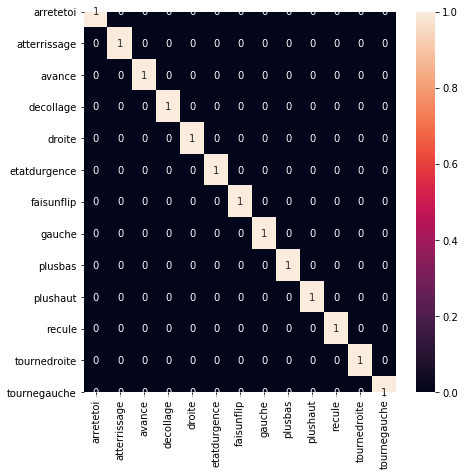

In [53]:
z = buildConfusionMatrix("reference", "reference")
drawConfusionMatrix(z)

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 11 bonnes réponses. 
 SCORE = 0.85%


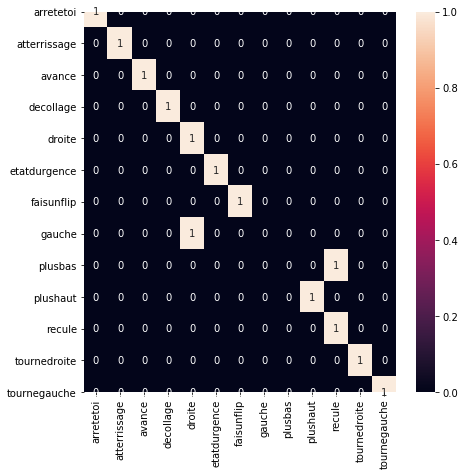

In [100]:
cfsm = buildConfusionMatrix("reference", "nonbruite", "M02")
drawConfusionMatrix(cfsm)

Comparaison M01 sans bruit avec F01 sans bruit

In [ ]:
cfsm = buildConfusionMatrix("reference", "nonbruite", "F01")
drawConfusionMatrix(cfsm)

Partie III, ACP

Réduction de dimension par $ACP$

In [36]:
def moyenneMfccs(corpusReference):
    """
    Cette fonction créer la matrice qui contient pour la colonne i, un vecteur de dimension 12 qui correspond à la moyenne colonne par colonne de la mfcc associée
    Input : Liste des 13 actions (.wav), ce corpus représente notre base de référence (définie arbitrairement)
    Output : Matrice numpy (12,13)
    """
    L = []
    for e in corpusReference:
        m1, sr_m1 = librosa.load(e)
        mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
        n_mfcc=12)
        L.append(np.mean(mfcc_m1.transpose(), axis = 0))
    return np.asarray(L)
 
# on récupère la matrice qui pour la ligne i, contient le vecteur de dimension 12 qui est la moyenne colonne par colonne de l'action i.
I = moyenneMfccs(all_actions_from_path_withID("nonbruite", "M01")).transpose()
scaler = StandardScaler()
scaler.fit(I)
I_center = scaler.transform(I) # on centre les données
pca = PCA(n_components=3)
P = pca.fit_transform(I_center).transpose() # réduction en dimension 3
print(P.shape)

(3, 12)


In [37]:
def build_set_for_suppervisedlearning(typeSon):
    trainingSet = []
    all_ids = IDs[typeSon]
    
    for i in range(len(all_ids)):
        temp = moyenneMfccs(all_actions_from_path_withID(typeSon, all_ids[i])).transpose()
        trainingSet.extend((P @ temp).transpose())
    
    return np.array(trainingSet)

def build_training_set_answers(typeSon):
        
        #Construction des réponses (apprentissage supervisé)
        suppervised = []
        for ID in IDs[typeSon]:
            suppervised.extend(all_actions_from_path_withID(typeSon, ID))
        return suppervised


    
    
    
# # #Construction data set de training
# K = []

# typeSon = "nonbruite"
# all_ids = IDs[typeSon]

# print(all_ids)

# for e in range(len(all_ids)):
#     temp = moyenneMfccs(all_actions_from_path_withID(typeSon, all_ids[e])).transpose()
#     K.extend((P @ temp).transpose())

# #Construction des réponses (apprentissage supervisé)
# suppervised = []
# for ID in IDs[typeSon]:
#     suppervised.extend(all_actions_from_path_withID(typeSon, ID))

# len(suppervised)
    

In [38]:
# #Construction data set de test
# K_test = []

# typeSon_test = "reference"
# all_ids = IDs[typeSon_test]

# print(all_ids)

# for e in range(len(all_ids)):
#     temp = moyenneMfccs(all_actions_from_path_withID(typeSon_test, all_ids[e])).transpose()
#     K_test.extend((P @ temp).transpose())

# K_test = np.array(K_test)

# print(K_test.shape)
# print(K_test)

In [90]:
# remarque : si on utilise nonbruité pour l'apprentissage et référence (qui est un sous ensemble de nonbruité) 
# pour le test, bonne nouvelle on obtient 13 / 13. Par contre si on prend autre chose pour le test les résultats
# sont (assez) mauvais.
def kppv(training_set, suppervied_answers, prediction_set):
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(training_set, suppervied_answers) 
    L, R = [], []
    res = neigh.predict(prediction_set)
    print(res)
    cpt = 0
    for pred_i, res_i in list(zip(res, actions)):
        left, right = pred_i.split('/')[-1].split('.')[0].split('_')[-1], res_i 
        L.append(left)
        R.append(right)
        if left == right:
            cpt+=1
    return list(zip(R, L)), cpt

In [93]:
training_set, suppervied_answers = build_set_for_suppervisedlearning("nonbruite"), build_training_set_answers("nonbruite")
prediction_set = build_set_for_suppervisedlearning("test")
print(prediction_set)
print(training_set.shape, " == ", len(suppervied_answers))

[[-4.4059795e+03 -1.9440523e+01 -2.3336010e+00]
 [-4.0064146e+03 -3.1612209e+01  3.3588266e+00]
 [-4.5032964e+03 -2.2214989e+01 -7.1561661e+00]
 [-4.5635786e+03 -1.4256809e+01  4.8138471e+00]
 [-4.8748052e+03 -9.2216492e-01 -4.6633720e+00]
 [-4.1439980e+03 -2.7211578e+01 -2.9837613e+00]
 [-4.6372588e+03 -1.5607912e+01  1.4325920e+00]
 [-4.3945537e+03 -9.5756292e+00  1.3166187e+00]
 [-4.7205391e+03 -9.9452000e+00  8.2798392e-01]
 [-4.8703838e+03  2.9133606e-01  2.1026886e+00]
 [-4.7011216e+03 -1.1765324e+01  3.9437225e+00]
 [-4.3505747e+03 -1.6823050e+01 -3.9336448e+00]
 [-4.0571982e+03 -3.0997574e+01  9.4378829e-01]]
(234, 3)  ==  234


In [91]:
D, cpt = kppv(training_set, suppervied_answers, prediction_set)
print("score final : ", cpt, " / 13")
df = pd.DataFrame(D, columns=["Actions", "Prédictions"])
df.style.apply(lambda x: ["background: yellow" if x.iloc[1] == x.iloc[0] else "" for v in x], axis = 1)

['corpus/dronevolant_nonbruite/M07_gauche.wav'
 'corpus/dronevolant_nonbruite/M07_etatdurgence.wav'
 'corpus/dronevolant_nonbruite/M10_decollage.wav'
 'corpus/dronevolant_nonbruite/M03_atterrissage.wav'
 'corpus/dronevolant_nonbruite/M08_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M07_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M10_faisunflip.wav'
 'corpus/dronevolant_nonbruite/M07_gauche.wav'
 'corpus/dronevolant_nonbruite/M10_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M08_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M07_arretetoi.wav'
 'corpus/dronevolant_nonbruite/M10_atterrissage.wav'
 'corpus/dronevolant_nonbruite/M07_tournegauche.wav']
score final :  3  / 13


,Actions,Prédictions
0,arretetoi,gauche
1,atterrissage,etatdurgence
2,avance,decollage
3,decollage,atterrissage
4,droite,tournegauche
5,etatdurgence,tournegauche
6,faisunflip,faisunflip
7,gauche,gauche
8,plusbas,tournegauche
9,plushaut,tournegauche


In [42]:
colors = ["black","slategrey","blue","lightblue","cyan","Green","lightgreen","yellow","brown","orange","red","purple","pink"]

def plot_training_data3D(training_set):
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]

    fig = plt.figure()
    nlines, nrows = 7, 2

    fig = plt.figure(figsize=(20,50))

    for i in range(n):
        j = fig.add_subplot(nlines, nrows,i + 1, projection="3d")
        j.set_xlabel('X Label')
        j.set_ylabel('Y Label')
        j.set_zlabel('Z Label')
        j.set_ylim([-40,30])
        j.set_xlim([-7000,-4000])
        j.set_zlim([-8,4])

        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        j.scatter(x, y, z, c=colors[i], label=actions[i], s = 100, edgecolors='black')
        j.set_title("Données d'apprentissage pour : " + actions[i])
        j.legend(loc='center left', prop={'size': 15})
    plt.show()

<Figure size 1440x720 with 0 Axes>

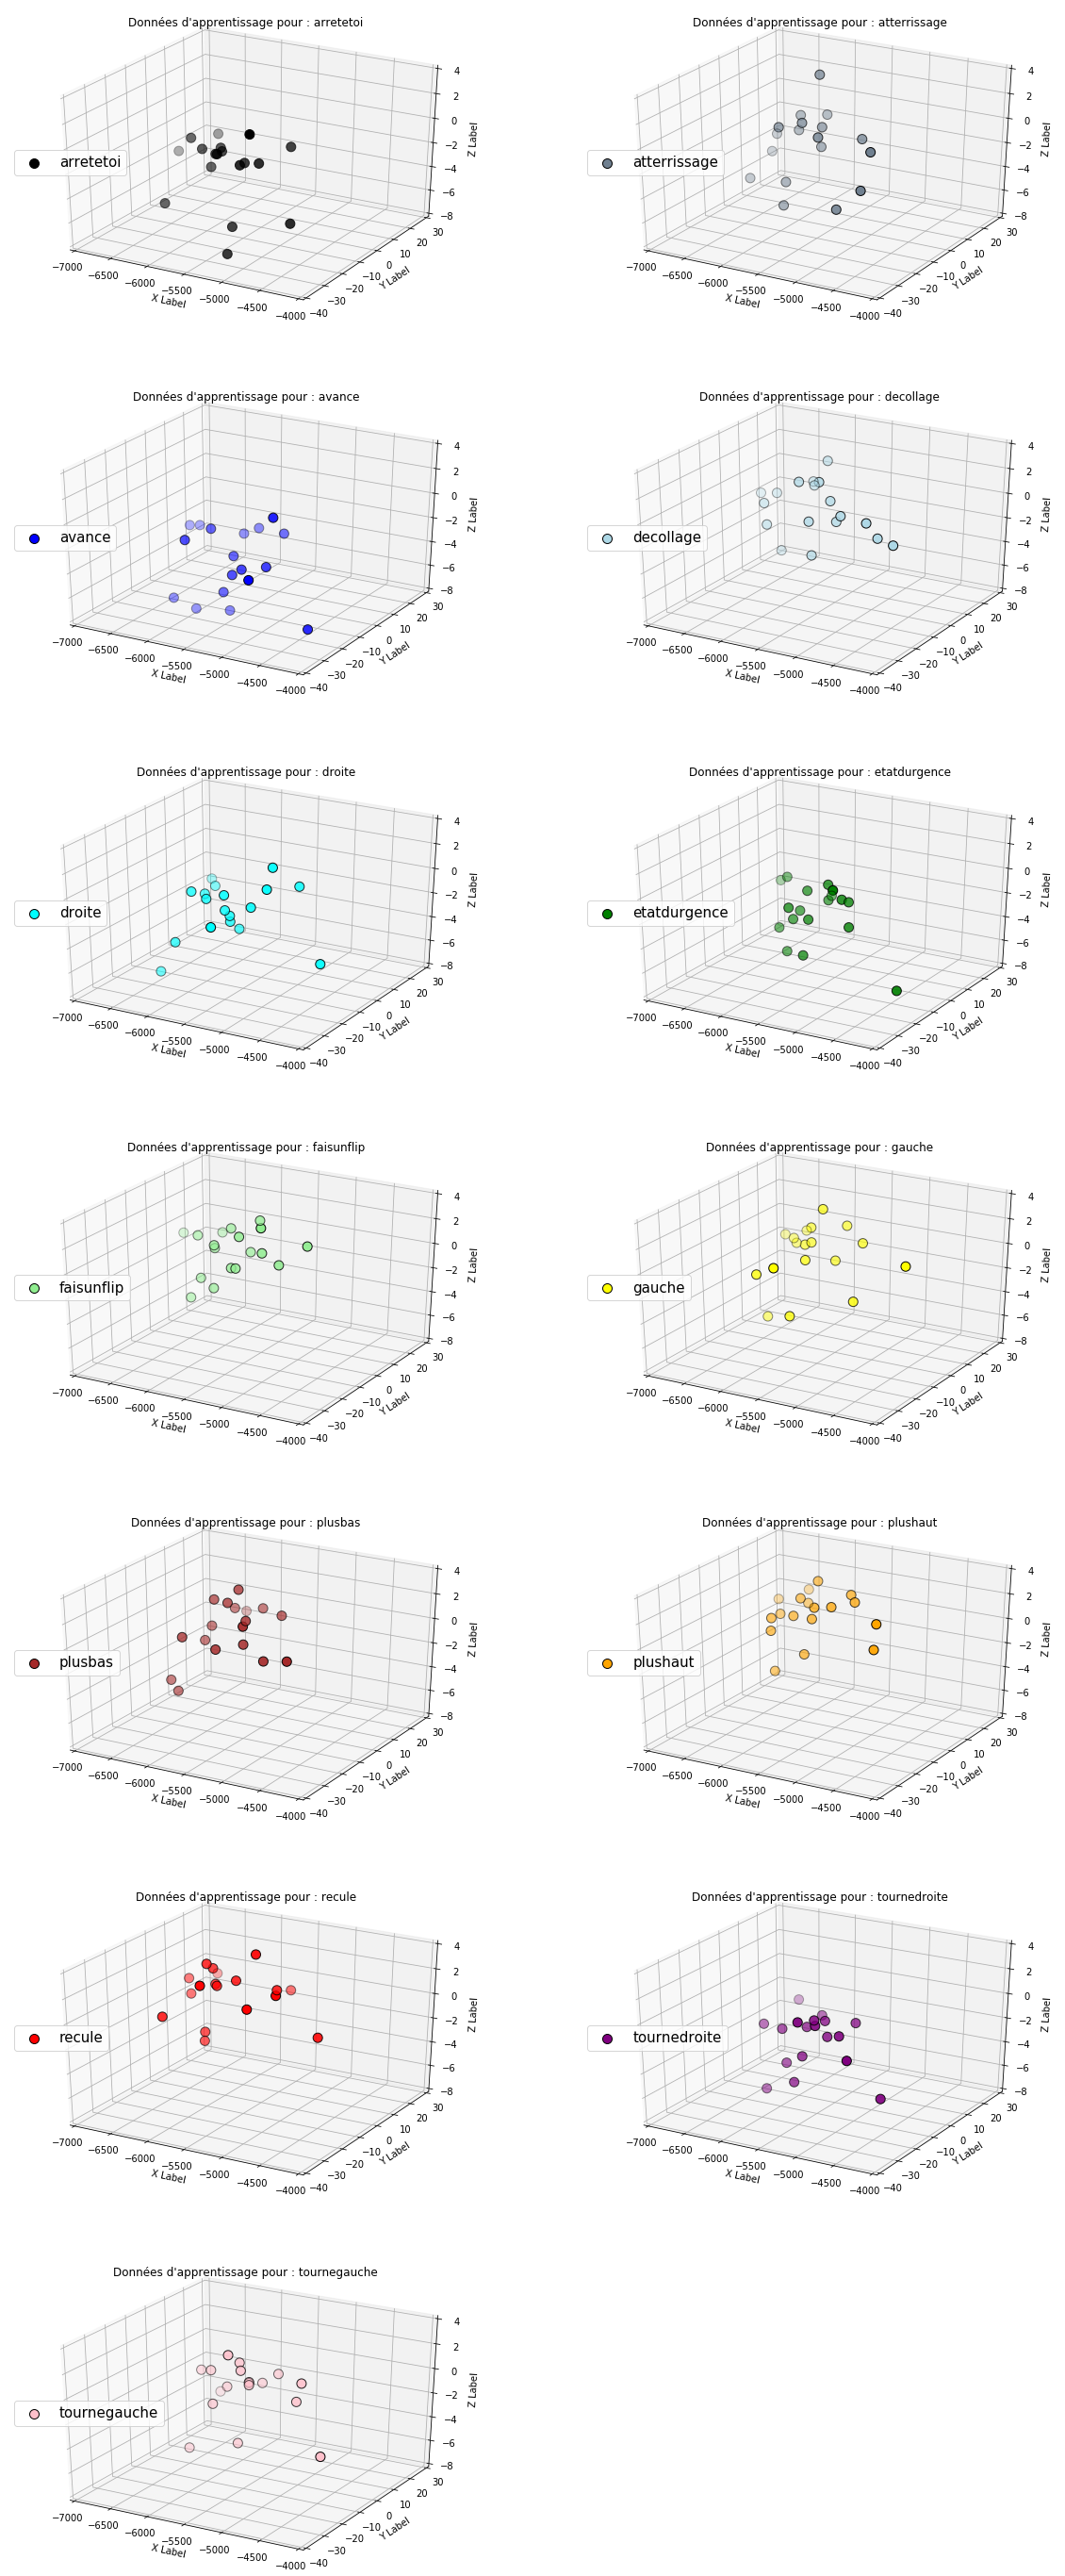

In [43]:
plot_training_data3D(training_set)

In [44]:
def plot_training_and_prediction_data3D(training_set, prediction_set, size_dots_training_set, size_dots_prediction_set):
    
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]
    
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig = plt.figure(figsize=(20,40))
    
    #### Plot training data + prediction data ####
    
    ax = fig.add_subplot(gs[0, :], projection="3d")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax.scatter(x,y,z, c=colors[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")

    xpredict, ypredict, zpredict = prediction_set[:,0], prediction_set[:,1], prediction_set[:,2]
    for i in range(n):
        ax.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax.legend(loc='center left', prop={'size': 15})    
    ax.set_title("Données d'apprentissage ET données de tests")

    
    
    
    
    #### Plot training data ####

    fig = plt.figure(figsize=(20,20))
    ax2 = fig.add_subplot(gs[1,0], projection="3d")
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_title("Données d'apprentissage")


    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax2.scatter(x,y,z, c=colors[i], label=actions[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")
        ax2.legend(loc='center left', prop={'size': 15})


    
    
    #### prediction data ####

    ax3 = fig.add_subplot(gs[1,1], projection="3d")
    ax3.set_xlabel('X Label')
    ax3.set_ylabel('Y Label')
    ax3.set_zlabel('Z Label')
    ax3.set_title("Données de tests")

    for i in range(13):
        ax3.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax3.legend(loc='center left', prop={'size': 15})    

    plt.show()

<Figure size 1440x720 with 0 Axes>

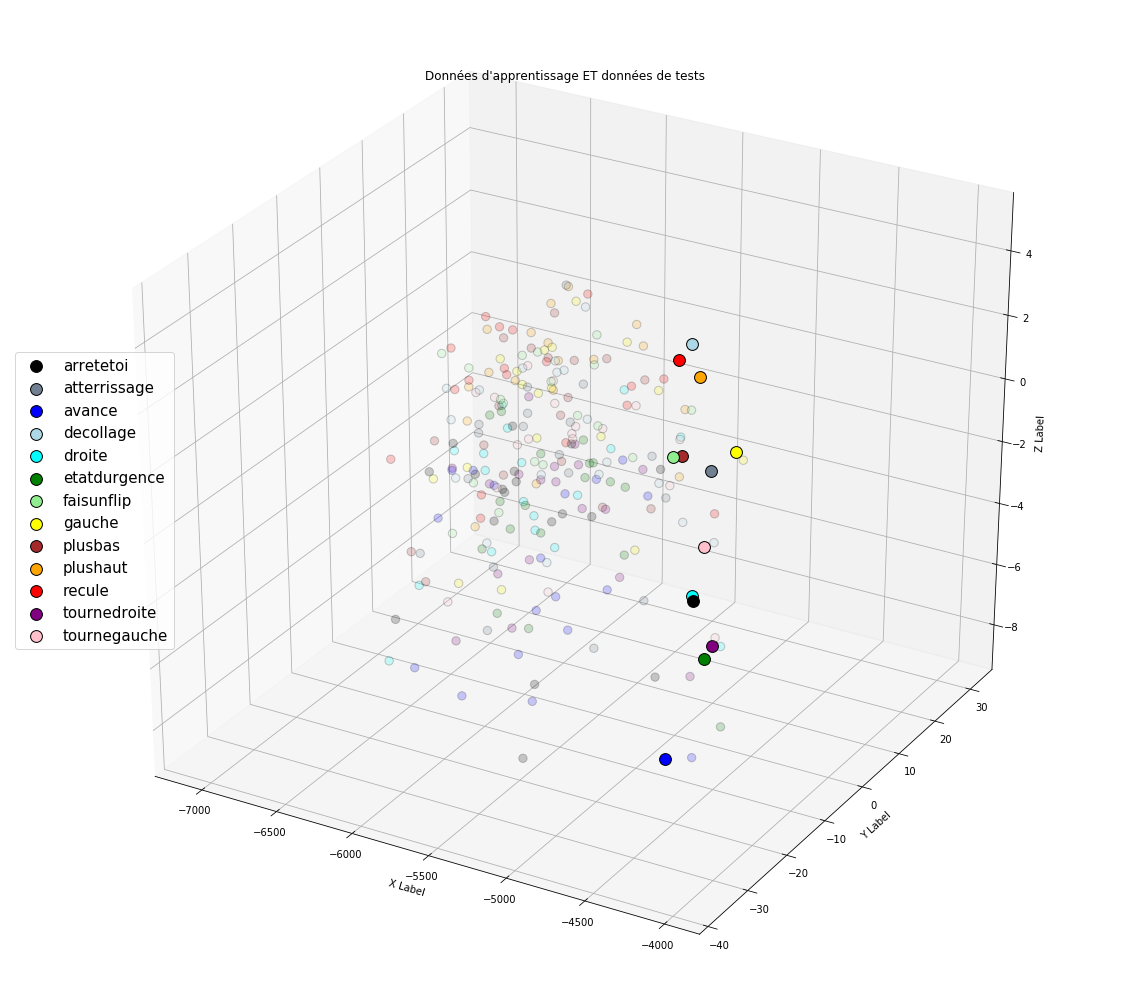

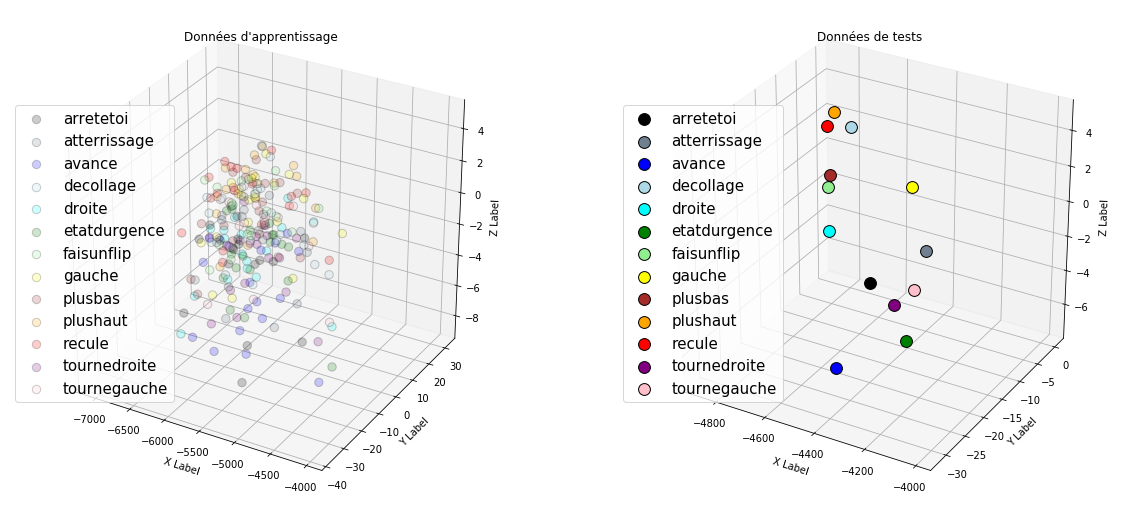

In [45]:
plot_training_and_prediction_data3D(training_set, prediction_set, 70, 140)

In [46]:
training_set, suppervied_answers = build_set_for_suppervisedlearning("nonbruite"), build_training_set_answers("nonbruite")
prediction_set = build_set_for_suppervisedlearning("test")
print(training_set.shape, " == ", len(suppervied_answers))

(234, 3)  ==  234


In [47]:
D, cpt = kppv(training_set, suppervied_answers, prediction_set)
print("score final : ", cpt, " / 13")
df = pd.DataFrame(D, columns=["Actions", "Prédictions"])
df.style.apply(lambda x: ["background: yellow" if x.iloc[1] == x.iloc[0] else "" for v in x], axis = 1)


score final :  3  / 13


,Actions,Prédictions
0,arretetoi,gauche
1,atterrissage,etatdurgence
2,avance,decollage
3,decollage,atterrissage
4,droite,tournegauche
5,etatdurgence,tournegauche
6,faisunflip,faisunflip
7,gauche,gauche
8,plusbas,tournegauche
9,plushaut,tournegauche


In [48]:
def plot_training_data3D(training_set):
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]

    fig = plt.figure()
    nlines, nrows = 7, 2

    fig = plt.figure(figsize=(20,50))

    for i in range(n):
        j = fig.add_subplot(nlines, nrows,i + 1, projection="3d")
        j.set_xlabel('X Label')
        j.set_ylabel('Y Label')
        j.set_zlabel('Z Label')
        j.set_ylim([-40,30])
        j.set_xlim([-7000,-4000])
        j.set_zlim([-8,4])

        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        j.scatter(x, y, z, c=colors[i], label=actions[i], s = 100, edgecolors='black')
        j.set_title("Données d'apprentissage pour : " + actions[i])
        j.legend(loc='center left', prop={'size': 15})
    plt.show()

<Figure size 1440x720 with 0 Axes>

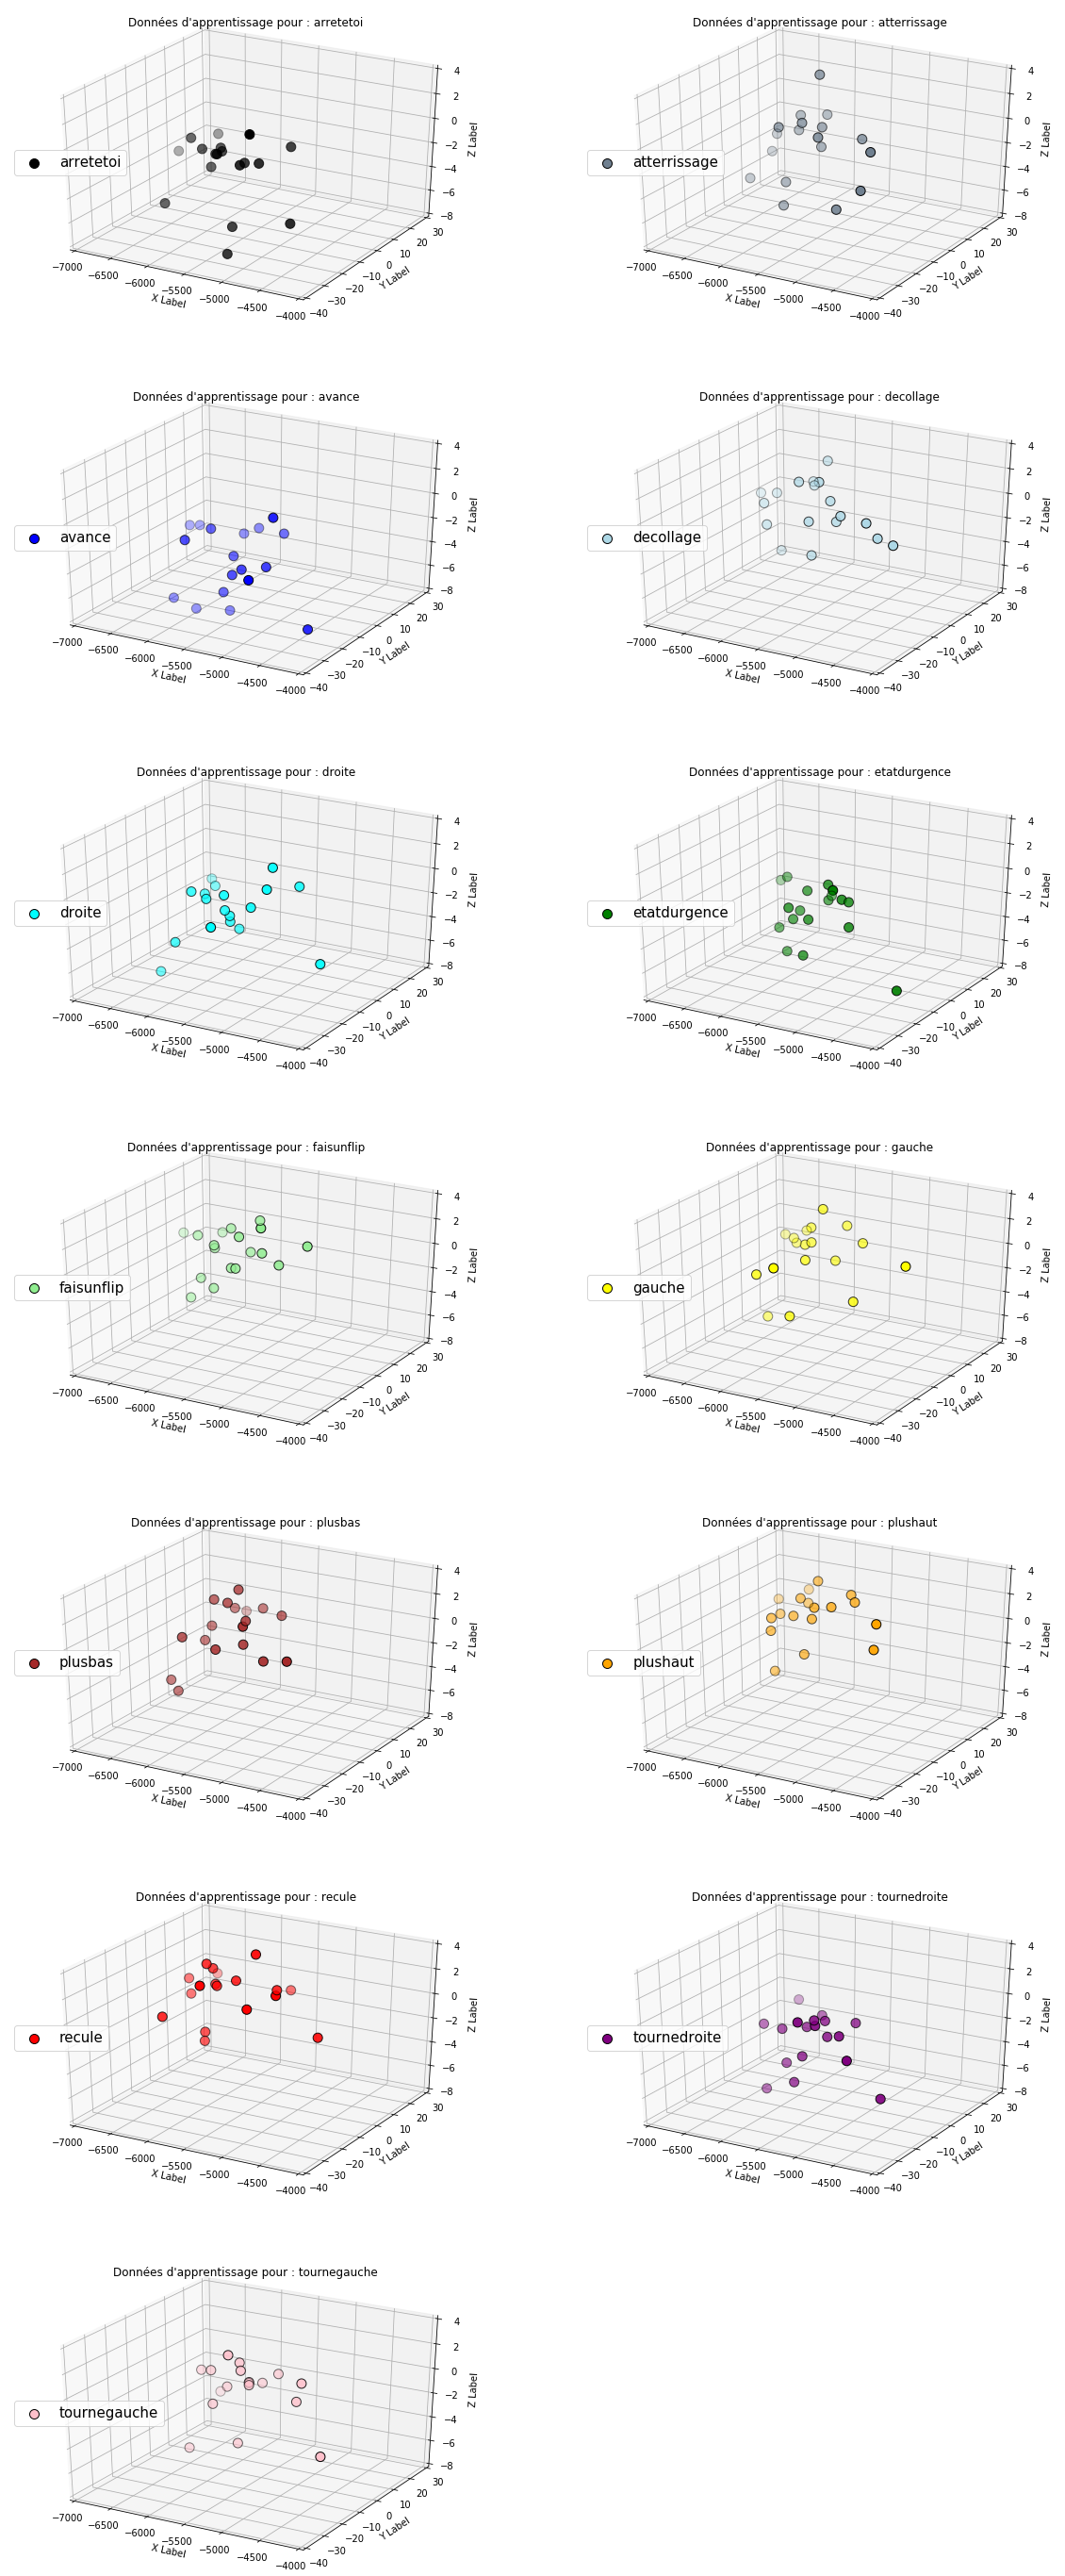

In [49]:
plot_training_data3D(training_set)

In [50]:
def plot_training_and_prediction_data3D(training_set, prediction_set, size_dots_training_set, size_dots_prediction_set):
    
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]
    colors = ["black","slategrey","blue","lightblue","cyan","Green","lightgreen","yellow","brown","orange","red","purple","pink"]
    
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig = plt.figure(figsize=(20,40))
    
    #### Plot training data + prediction data ####
    
    ax = fig.add_subplot(gs[0, :], projection="3d")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax.scatter(x,y,z, c=colors[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")

    xpredict, ypredict, zpredict = prediction_set[:,0], prediction_set[:,1], prediction_set[:,2]
    for i in range(n):
        ax.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax.legend(loc='center left', prop={'size': 15})    
    ax.set_title("Données d'apprentissage ET données de tests")

    
    
    
    
    #### Plot training data ####

    fig = plt.figure(figsize=(20,20))
    ax2 = fig.add_subplot(gs[1,0], projection="3d")
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_title("Données d'apprentissage")


    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax2.scatter(x,y,z, c=colors[i], label=actions[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")
        ax2.legend(loc='center left', prop={'size': 15})


    
    
    #### prediction data ####

    ax3 = fig.add_subplot(gs[1,1], projection="3d")
    ax3.set_xlabel('X Label')
    ax3.set_ylabel('Y Label')
    ax3.set_zlabel('Z Label')
    ax3.set_title("Données de tests")

    for i in range(13):
        ax3.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax3.legend(loc='center left', prop={'size': 15})    

    plt.show()

<Figure size 1440x720 with 0 Axes>

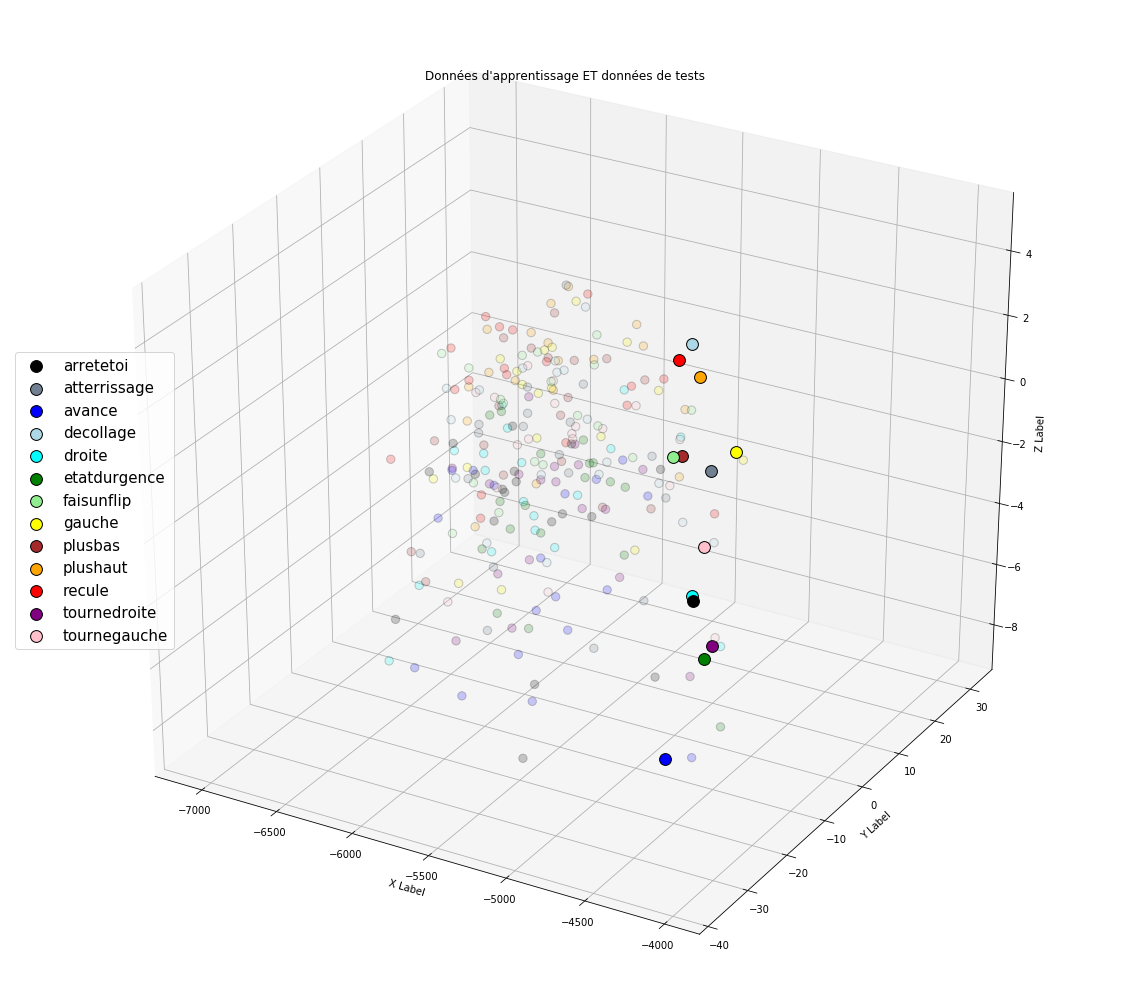

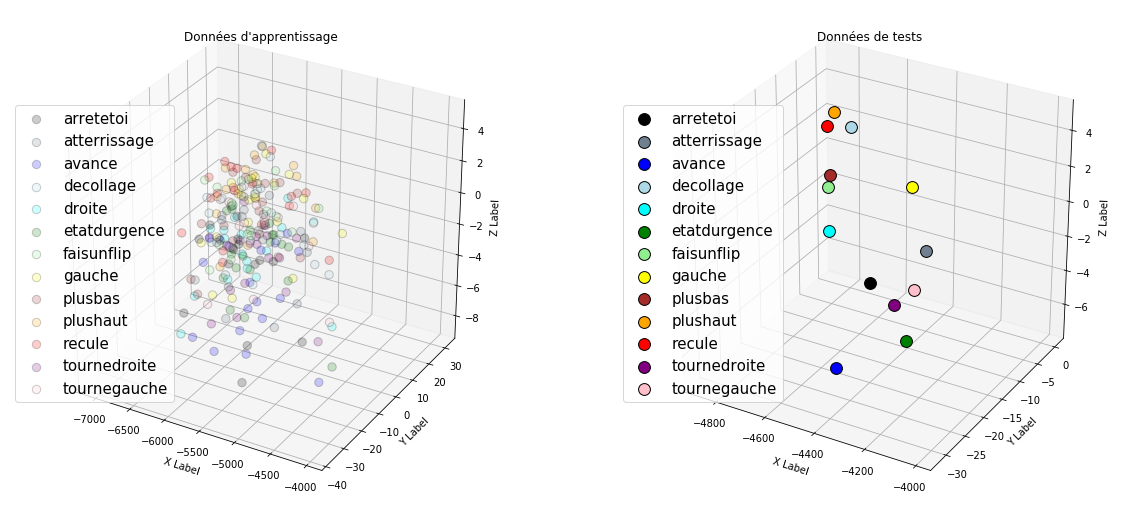

In [51]:
plot_training_and_prediction_data3D(training_set, prediction_set, 70, 140)

In [ ]:
# diego : étude homme femme + comparaison KPPV 
# benji : étude voix benji + manip des données